   # Deep Learning using supervised ANN
   #### Explore data science academy

#  Learning Objectives

- Understand supervised ANN
- Build ANN using tensorflow library 

# Outline

- Backgroud of Artficial Neural Network 
- Build Neural Network
- Implementation and evaluation of ANN

# Background of ANN

- ANNs are powerful non-linear mathematical approaches that mimic the behaviour demonstrated by biological neurons 
- ANNs use the process of deep learning to understand the pattern of the problem from the historical data and the learned pattern is then used to generalize the likely outcome

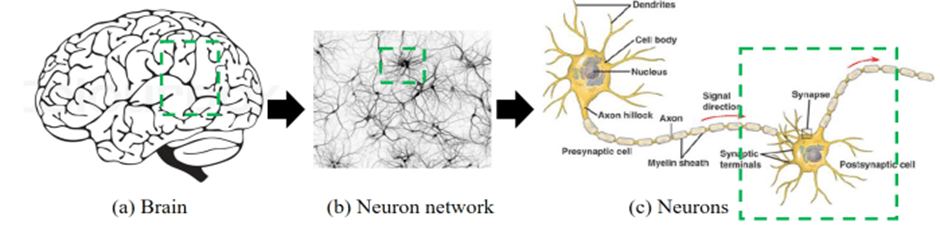

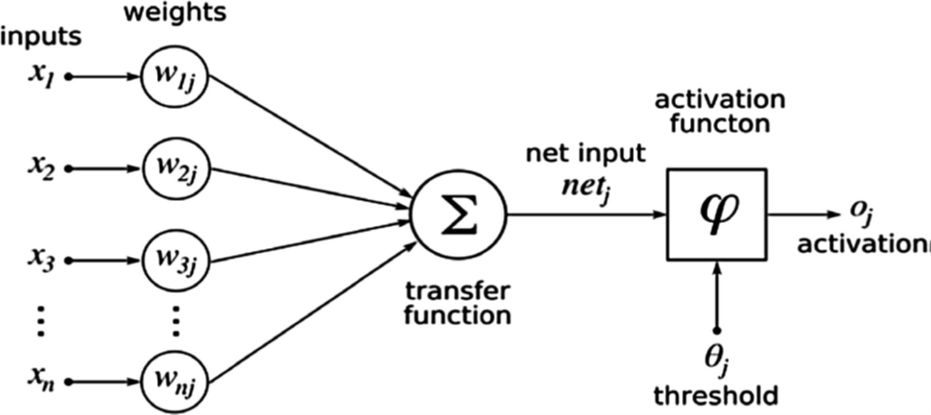

## Structure of ANN

- **First layer** consist of the input variables feeding the neural model.
- The **second layer** or **hidden layer (s)** act as the connector, and is aimed to minimise the overlay between patterns
- The selection of the optimal number hidden layers (ℎk ≥ 1, k=1, 2,…, n) and number of neurons in the hidden layers are critical for designing the ANN structure. They varies depending on the complexity of the problem
- Tranfer function uses bias
- Activation function in the hidden layer transforms the weight input signal in the hidden neurons
- The strength of connection to neurons in the hidden layer is the product of weights (𝑤1, 2,…,𝑤n ∈ 𝑊) and inputs x=(x_1,x_2,...,x_n) 

## Learning in NN model
### Feed-forward and back propagation mechanism

- ANNs use **feed-forward propagation** mechanism for learning and **backwards propagation** to compute loss functions
- The random **weights** and **bias** are generated during **feed-forward**, 
- **Activation functions** are assigned during this process
 
- **Back propogation** is an adaptive approach used to compute the loss functon after a successful optimization of weight (randomised values) to every connection
- The error/loss function `(y,f(x))` is the difference between target and predicted values

### Optimization of NN model 

The performance of ANN is influenced by numerous hyper-parameters among others such as:
1. Learning rate, 
2. The number of neurons,
3. Number of hidden layers,
4. the number of epochs, 
5. Activation functions 
6. Loss function optimizers to regulate or minimize the cost function 

# Build the Neural Network using Tensorflow Framework

- Unlike other regression models like **decision trees** or **vector machines** which use `scikit-learn`, that lready has most of the built-in function like `pandas`, `matplotlib` etc.   
- To build NN, it first require to install following libraries using **anaconda command prompt**;
- conda or pip install `tensorflow`
- conda or pip instal `pandas`
- conda or pip install `Sklearn` 
- conda or pip install `matplotlib`

In [1]:
### import the libraries
import numpy as np # library for to arrays
import pandas as pd# library to handle data in a vectorized manner

## Load the data
- The data set used contains information on 78 people using one of three diets to loose weight. 
- Can be downloaded using on foolowing website; 'https://www.sheffield.ac.uk/mash/statistics/datasets

In [2]:
df = pd.read_csv('Diet_R.csv')
df.head(5)# show the first five rows of the uploaded data

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,0,41,171,60,2,60.0
1,26,0,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


The data consist of the six varaibles;
- `Gender`, 1 = male , 0 = female

- `Age` in years 

- `Height` in cm

- `Pre.weight` in Kg (weight before the diet(kg)
- `Diet` as 3, 2, 1 use binary number (nomimal numbers)
- `weight6weeks` in kg (weight after 6 weeks)

We shall use **Gender**, **Age**, **Height**, **Pre.weight** and **Diet** as independant variables to predict **weight after 6 weeks of diet**

In [3]:
len(df) 

78

The `len` function determines the length of the data 

**To visualise the multivariant relationship use `seaborn` function**

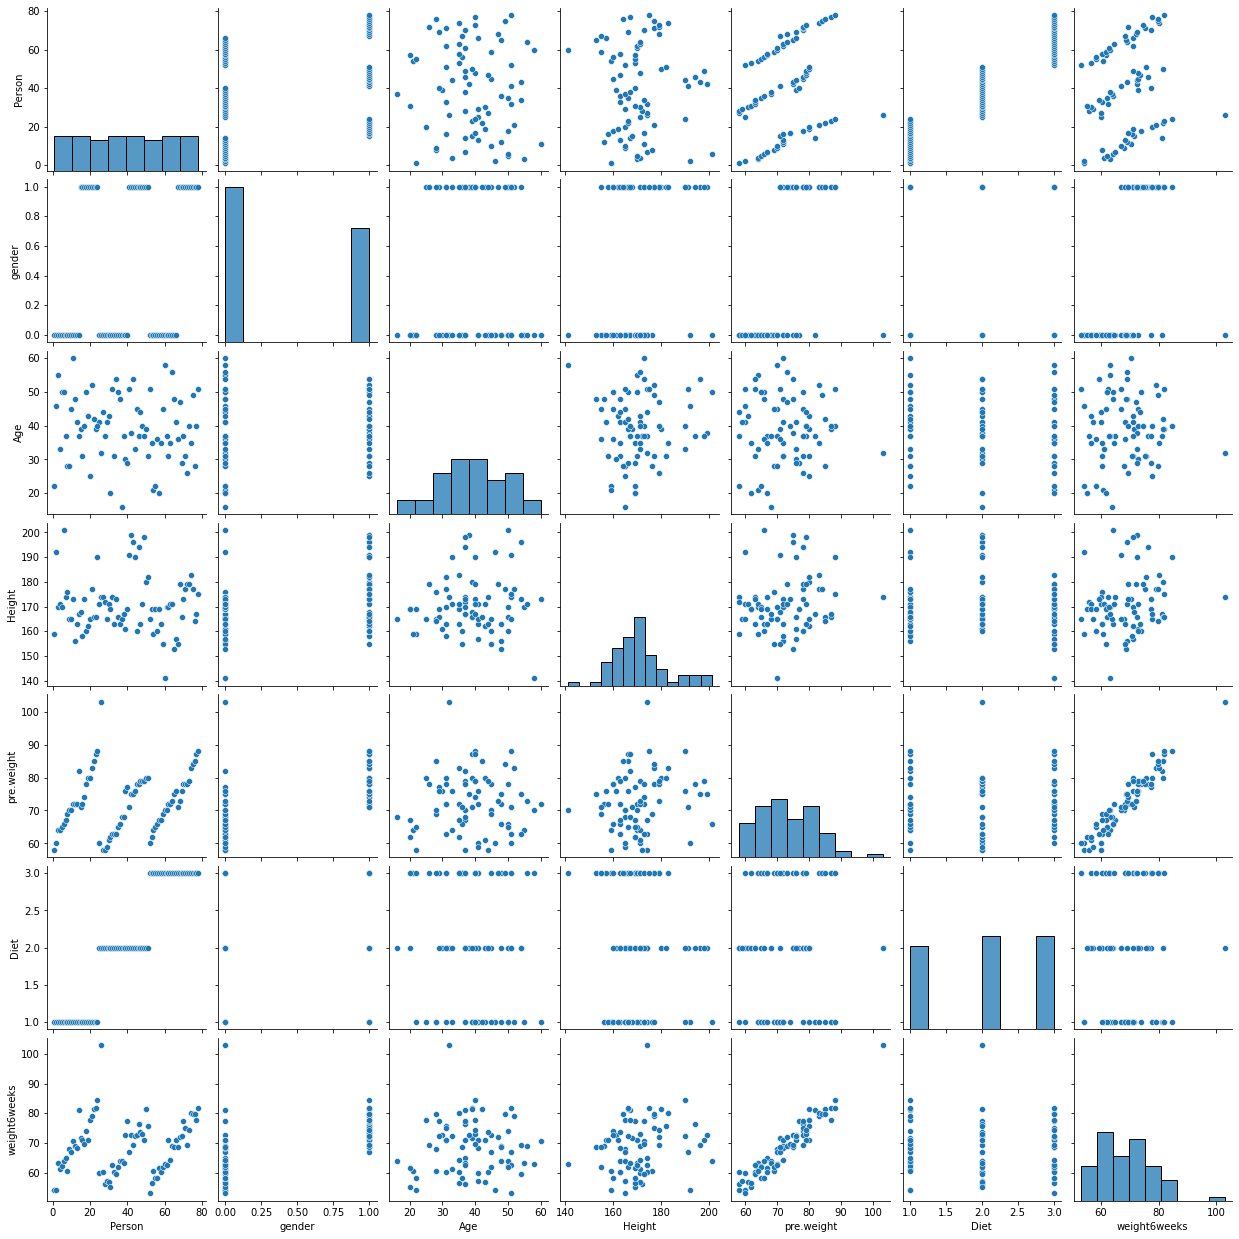

In [4]:
import seaborn as sb # 
sb.pairplot(df)

### Assign x and y-output from the loaded data

The `Diet_R.csv` has 7 columns but only 6 will be used for modelling, Hence 
- The `iloc` function assist to select only the columns essential varaibles from the data
- The first column **(person)** is just the number of the participants not a variable

In [5]:
X = df.iloc[:, 1:6]
Y = np.asarray(df.iloc[:, 6]).reshape(-1,1)
print (X) # show the selected variables 

    gender  Age  Height  pre.weight  Diet
0        0   41     171          60     2
1        0   32     174         103     2
2        0   22     159          58     1
3        0   46     192          60     1
4        0   55     170          64     1
..     ...  ...     ...         ...   ...
73       1   35     183          83     3
74       1   49     177          84     3
75       1   28     164          85     3
76       1   40     167          87     3
77       1   51     175          88     3

[78 rows x 5 columns]


In [6]:
# Double checking the selected Y output
print(Y[:5])

[[ 60. ]
 [103. ]
 [ 54.2]
 [ 54. ]
 [ 63.3]]


### Split the data into training and testing data sets

Import the `train_test_function`

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Set 70% for training the model
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70, random_state=0)

In [9]:
len(X_train)# this function check the length of the training data after splitting

54

### *At this jenture we have loaded the data, split and checked that correct variables are assigned*
*** 

## Developing the Neural Network Structure 

In [10]:
import tensorflow as tf # library for numerical computing and creating NN framework

In [12]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()# using tensorflow version 2.0 but for version < 2.0 its not required

### **To build the ANN structure** 
- Set the number of neurons for input(s) and output(s) equivalent to the dimension of the data sets.
- The ANN topology was ensembled using a single hidden layer.
- `Diet_R.csv` has 5 features and 1 output
- Create `placeholder` for both input(s) and output
- The `float()` module returns a floating point number from a number or a string.e.g 25 becomes 25.0
- A `placeholder()` is a place in memory where the variables will be stored

In [13]:
X = tf.placeholder("float", [None, 5])# 5 features or inputs 
Y = tf.placeholder("float", [None, 1])# 1 output 

For inputs and output;;
- The first dimension of the placeholder is `None`, meaning we can have any number of rows.
- The second dimension is fixed at 5, meaning each row needs to have five columns of data
- The second dimension is fixed at `1`, meaning each row needs to have 1 column of data

In [14]:
# define weight initialisation process 
weights = {
    'h1': tf.Variable(tf.random_normal([5, 14])),# 5 inputs
    'out': tf.Variable(tf.random_normal([14, 1]))# 1 ouput 
}
biases = {
    'b1': tf.Variable(tf.random_normal([14])),
    'out': tf.Variable(tf.random_normal([1]))
}

- The assigned number of neurons in hidden layer is `14`. 
- However,different number of nuerons can be utilised, its a **try and error procedure** 

### Train the ANN Model

- Now that we have created our TensorFlow placeholders. 
- Next step is to define optimizers or hyper parameters for learning and, to run the model.
- **Note** training use 70 percent of the data 

In [15]:
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)# #assign activation function
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return (out_layer)

- Module `tf.matmul()` is the matrix multiplication operation of weights
- Module `tf.nn.**AF**`**AF** represent different activation functions, above the rectified linear unit(relu) is used, but others including tanh or sigmoid can be applied as well

In [16]:
Y_hat = neural_net(X)# the prediction function
 
loss_op = tf.losses.mean_squared_error(Y, Y_hat) 

optimizer = tf.train.AdamOptimizer(learning_rate=0.1) 
train_op = optimizer.minimize(loss_op)

init = tf.global_variables_initializer() #Then we initialize all the global variables in the graph.
epoch = 500 # different epochs can be used, just be becareful with overfitting 

- Module `tf.train.Tptimizer`, **T** represent different optimizer functions
- Module `learning_rate=X`, set X to different values
- Module `tf.losses`compute the loss functions or error function or cost function based on ** mean_squared_error**
- Loss function is the difference between the target/actual and predicted value
- Epochs the number of iterations

In [17]:
for t in range(0, 10): 
    with tf.Session() as sess:#We launch the graph in a session.
        sess.run(init)
        for i in range(0, epoch): #For each epoch value tested
            sess.run(train_op,feed_dict={X: X_train,Y: Y_train})
            loss = sess.run(loss_op, feed_dict={X: X_train,Y: Y_train})
            pred = sess.run(Y_hat, feed_dict = {X:X_test})      

- Module `feed_dict` feed values to TensorFlow placeholders
- module `sess.run` run the model based on the provided instructions 

## Evaluation of the NN
- Now that after the model is trained, its time to evaluate the perfomance of the model using 30% data not used during training 
- Among other several RMSE, MSE, MAE erros, we select the `NSE` and `R2` errors

In [18]:
from math import sqrt
import scipy.stats as ss # To access statistics functions

In [19]:
#Nash Sutcliffe efficiency rating (NSE)
def NSE(dataset_pred, dataset_obs):
    p1 = 0
    p2 = 0
    for i in range(len(dataset_pred)):
        u1 = (dataset_obs[i] - dataset_pred[i])**2
        u2 = (dataset_obs[i] - np.mean(dataset_obs))**2
        p1 += u1
        p2 += u2
    nse = 1 - (p1/p2)        
    return nse 


### TESTING error

In [20]:
#Define and print the values of
r_test_run = []
NSE_test = []

In [22]:
        _,_,r_test,_,_ = ss.linregress(Y_test.reshape(1,-1), pred.reshape(1,-1))
        r_test_run.append(r_test)  
        NSE_test.append(NSE(pred, Y_test))

In [23]:
num = []
for i in range(0, 50): 
    num.append(i) # number of interations and average value 

In [24]:
print('R_Squared:', np.mean(r_test_run))
print('NSE:', np.mean(NSE_test))


R_Squared: 0.8713335348676899
NSE: 0.7184974755977416


### Visualisation of the model performance 

In [25]:
import matplotlib.pyplot as plt # Matplotlib is used as plotting module


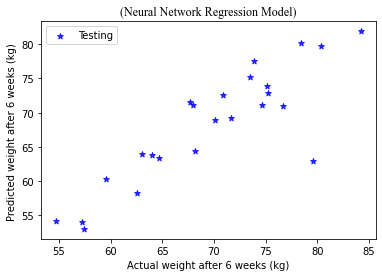

In [26]:
#set figure properties
plt.figure(figsize=(6,4))
plt.scatter(pred,Y_test, alpha=0.8, color='blue', marker='*',label='Testing')
plt.title('(Neural Network Regression Model)', fontname='times new roman', fontsize=12)
plt.legend()
plt.ylabel('Predicted weight after 6 weeks (kg) ')
plt.xlabel('Actual weight after 6 weeks (kg)')
plt.show()

- The **Predicted** values are simulated using the trained NN model
- The **actual** values are target in the independent data set not used for training 

## Performance assessment criteria

### To assess the perfomance of the model the following criteria was applied

**Model performance rating based on NSE** 
 - very good (0.75-1.00), good (0.65-0.75), Satisfactory (0.50-0.65), Acceptable (0.40-0.50), Unsatisfactory ( ≤ 0.40)
 
**Model performance rating based on R-square**
- very good (0.85-1.00), good (0.70-0.85), Satisfactory (0.60-0.70), Acceptable (0.40-0.60), Unsatisfactory ( ≤ 0.40)

*See refereence for further reading (Moriasi et al., 2007; Alexander et al., 2015; Pradhan et al., 2020; Hou et al., 2020)*

## Exercise 

1. Use different optimizers such as **stochastic gradient descent** method instead of **Adam** applied above
2. Use different activation functions such **tanh** or **sigmoid** instead of **Relu**, and compare the performance
3. Use different **number of neurons** and **epochs**, to generate NN structures   
4. Classify the model as overfitting or underfitting by calculating the training error